## Final Project Submission

Please fill out:
* Student name: Susanna Han
* Student pace: part time 
* Scheduled project review date/time: 11/23/2019
* Instructor name: James Irving
* Blog post URL: https://medium.com/@susanna.jihae.han/blog-post-7f6e1ff7d833


# Introduction

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import*

fsds_1007219  v0.4.44 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(16,16)
plt.style.use('seaborn')
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
kc_df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns',0)

In [4]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
kc_df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [7]:
for col in kc_df.columns:
    print(col,'\n',kc_df[col].value_counts(normalize=True).head(),'\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    


From the data above we are able to break down the columns into different categories to help us clean the data for future visualization.
## Types of Columns  
    
    DATE:                        
        - date                          
        - yr_built                      
        - yr_renovated                  
                               
    CATEGORICAL:
        - waterfront
        - view
        - condition
        - grade

    FLOATS AND INTEGERS:
        - price (dependent variable)
        - bedrooms
        - bathrooms
        - sqft_living
        - sqft_lot
        - floors
        - sqft_above
        - sqft_basement
        - lat
        - long
        - sqft_living15
        - sqft_lot15
        
    OTHERS:
        - id
        - zipcode


# SCRUBBING data

First, I dropped the 'id' column because it is simply a marker for each row which does not add any value. As well as the 'yr_renovated' column show above, there are more than 95% of the data missing. After the columns have been dropped I filled in all the null and placeholder variables found to complete the data.

In [8]:
kc_df.drop('id', axis=1, inplace = True) 

In [9]:
kc_df.drop('yr_renovated', axis=1, inplace = True) 

In [10]:
kc_df['date'] = pd.to_datetime(kc_df['date'])

In [11]:
print('null values in data:')
nulls = kc_df.isnull().sum()
print(nulls[nulls>0])

null values in data:
waterfront    2376
view            63
dtype: int64


In [12]:
nulls_percentage = nulls/len(kc_df)
print(nulls_percentage[nulls>0])
#percentage of null values 

waterfront    0.110015
view          0.002917
dtype: float64


In [13]:
kc_df['waterfront'].fillna(kc_df['waterfront'].median(), inplace=True)
#kc_df['waterfront'].value_counts()
kc_df['view'].fillna(kc_df['view'].median(), inplace=True)
#kc_df['view'].value_counts()

In [14]:
kc_df['sqft_basement'] = kc_df['sqft_basement'].replace('?',0.0)
#kc_df['sqft_basement'].unique()

### Cleaning the Look of the Data

Now that all the columns and data are filled in I then convert the following columns into an integer to make it easier on the eyes: view, waterfront, and sqft_basement.  

In [15]:
kc_df['view'] = kc_df['view'].astype(int) 
kc_df['waterfront'] = kc_df['waterfront'].astype(int) 

In [16]:
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype(float) 
kc_df['sqft_basement'] = kc_df['sqft_basement'].astype(int) 

In [17]:
for col in kc_df.columns:
    print(col,'\n',kc_df[col].value_counts(normalize=True).head(),'\n\n')

date 
 2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    0.088438
3.0    0.028291
2.5    0.007455
Name: floors, dtype: float64 


waterfront 
 0    0.99324
1    0.00676
Name: waterfront, dtype: float6

In [18]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Multicollinearity

To make sure the cleaned out data is of high quality we run a couple of tests to verify. The first test is to check the correlation between all columns to see the similarities and what columns may overlap. If the correlation between two columns is above 75%, one of two columns are no longer needed as the information given overlap and do not add value. After, we will run a log transformation to see if we can help normalize the distribution of the data points in each column. If it does not we will then drop the speciifc log transformation.

In [19]:
def multiplot(corr):
    fig, ax = plt.subplots(figsize =(12,12))
    mask = np.zeros_like(np.abs(kc_df.corr().round(3)), dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True 
    sns.heatmap(np.abs(kc_df.corr().round(3)), mask=mask, annot = True, cmap ='Oranges', ax=ax)
    
    return fig, ax 

In [20]:
drop_cols = ['sqft_above','sqft_living']
kc_df.drop(drop_cols, axis=1, inplace=True)

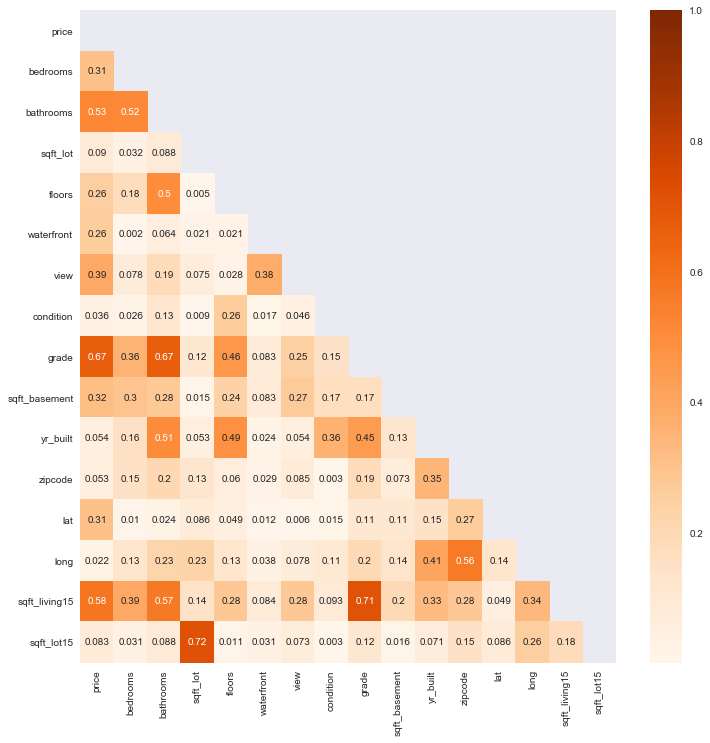

In [21]:
multiplot(np.abs(kc_df.corr()));

#### QUESTION 1: What does the plot say about the data of each column?
The plot above shows the correlation between each column in a matrix format with the percentage of correlation displayed. The correlation is then color coded with an orange color gradient. Higher the percentage of correlationthe darker shade of orange will be displayed.

Columns 'sqft_above' and 'sqft_living' showed multiple percentages higher than .75 with different variables indicating that the correlation is too high and no longer need the variables to add value to the model. This plot shows that there are less than 75% of correlation between all the listed variables.

# EXPLORING data

In [22]:
def check_column(kc_df, col_name, n_unique=10):
    """Displays info on null values, unique 
    values and displays .describe()
    
    Arg:
        kc_df(df): contains the columns
        col_name(str): name of the df column to show
        n_unique(int): number of unique values top show.
    Return:
        fig, ax(matplotlib Figure and Axes)
    """

    num_nulls = kc_df[col_name].isna().sum()
    print(f'Null Values Present={num_nulls}')
    
    print('Describe:')
    display(kc_df[col_name].describe().round(3))
    
    f = 'price~'+ col_name
    model = ols(formula=f, data=kc_df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(10,6));
    sns.distplot(kc_df[col_name],hist=False,color="m",kde_kws={"shade": True}, ax=axes[0])
    
    sns.regplot(x=col_name, y='price', data=kc_df, ax=axes[1])
    plt.tight_layout();
    
    return model

Null Values Present=0
Describe:


count    21597.000
mean         7.658
std          1.173
min          3.000
25%          7.000
50%          7.000
75%          8.000
max         13.000
Name: grade, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:48:44   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

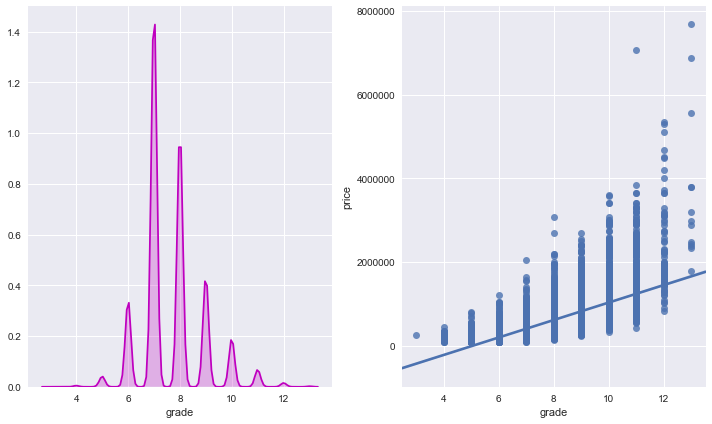

In [23]:
model=check_column(kc_df,'grade')

Using the definition created above we are able to check all columns information separatly. Making it easier to view data distribution and linear regression. It will also show obvious outliers within the data as well as your r-squared value to help determine the progress of the data srub. 

In [24]:
#model.params
#every xbedroom increases price by $x

QUESTION 2: WHAT DOES THE R-SQUARED VALUE TELL US about our data?
answer here

In [25]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)


In [26]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['bedrooms'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)
#it removed all True 

(21597, 17)
(21535, 17)


In [27]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['sqft_lot'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21535, 17)
(21190, 17)


In [28]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['floors'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21190, 17)
(21184, 17)


In [29]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['long'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(21184, 17)
(20966, 17)


In [30]:
print(kc_df.shape)
idx_outs = find_outliers(kc_df['sqft_lot15'])
kc_df = kc_df.loc[idx_outs==False]
print(kc_df.shape)

(20966, 17)
(20683, 17)


### Log Transformation

In [31]:
log_cols = ['bathrooms','bedrooms','floors','lat','long','sqft_living15',
            'sqft_lot','sqft_lot15','zipcode']

for col in log_cols:
    try: 
        kc_df[col+'_log']=np.log(kc_df[col])
    except:
        print(f'Error when logging {col}')

In [32]:
col_drop = ['bedrooms_log','bathrooms_log','floors_log','lat_log','long_log']
kc_df.drop(col_drop, axis=1, inplace=True)
#list columns to drop where log transformation didn't help.

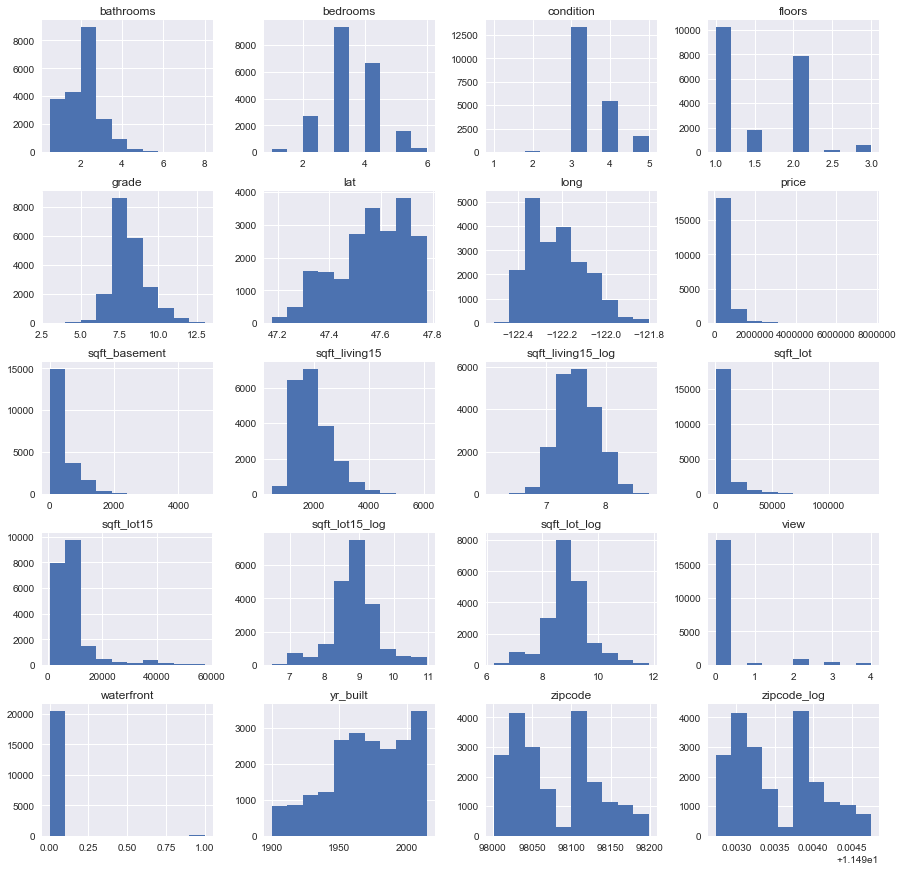

In [33]:
kc_df.hist(figsize=(15,15));

In [34]:
kc_df.describe().round(3)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living15_log,sqft_lot_log,sqft_lot15_log,zipcode_log
count,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000
mean,537565.014,3.362,2.103,9927.926,1.492,0.007,0.227,3.414,7.644,286.264,1970.612,98079.270,47.563,-122.224,1974.191,9018.794,7.534,8.897,8.875,11.494
std,366188.827,0.877,0.757,10790.749,0.541,0.081,0.756,0.652,1.157,435.572,29.535,53.948,0.138,0.128,676.950,7659.918,0.326,0.751,0.668,0.001
min,78000.000,1.000,0.500,520.000,1.000,0.000,0.000,1.000,3.000,0.000,1900.000,98001.000,47.176,-122.512,460.000,651.000,6.131,6.254,6.479,11.493
25%,320000.000,3.000,1.500,5000.000,1.000,0.000,0.000,3.000,7.000,0.000,1951.000,98033.000,47.478,-122.331,1480.000,5035.500,7.300,8.517,8.524,11.493
50%,450000.000,3.000,2.250,7482.000,1.500,0.000,0.000,3.000,7.000,0.000,1974.000,98072.000,47.575,-122.242,1830.000,7500.000,7.512,8.920,8.923,11.493
75%,640000.000,4.000,2.500,10154.000,2.000,0.000,0.000,4.000,8.000,550.000,1997.000,98118.000,47.679,-122.139,2340.000,9750.000,7.758,9.226,9.185,11.494
max,7700000.000,6.000,8.000,137214.000,3.000,1.000,4.000,5.000,13.000,4820.000,2015.000,98199.000,47.778,-121.802,6110.000,57500.000,8.718,11.829,10.960,11.495


### Z-Scoring

QUESTION 3: HOW DOES z-score HELP OUR DATA?
explain z-scoring here

In [35]:
num_cols = kc_df.drop(['price','waterfront','view','condition','grade','yr_built','date'], axis=1).columns
num_cols
#drop the cateogrical columns 

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sqft_living15_log', 'sqft_lot_log', 'sqft_lot15_log', 'zipcode_log'],
      dtype='object')

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc_df[num_cols])

In [37]:
kc_df_scaled = pd.DataFrame(data=scaled_data, columns=num_cols)
kc_df_scaled.describe().round(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living15_log,sqft_lot_log,sqft_lot15_log,zipcode_log
count,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000,20683.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.694,-2.117,-0.872,-0.911,-0.657,-1.451,-2.804,-2.257,-2.237,-1.092,-4.309,-3.519,-3.588,-1.451
25%,-0.413,-0.797,-0.457,-0.911,-0.657,-0.858,-0.618,-0.839,-0.730,-0.520,-0.719,-0.506,-0.526,-0.858
50%,-0.413,0.193,-0.227,0.014,-0.657,-0.135,0.092,-0.141,-0.213,-0.198,-0.067,0.031,0.071,-0.135
75%,0.727,0.524,0.021,0.939,0.606,0.718,0.846,0.666,0.540,0.095,0.688,0.438,0.464,0.718
max,3.008,7.787,11.796,2.789,10.409,2.219,1.560,3.307,6.110,6.329,3.637,3.904,3.120,2.219


In [38]:
kc_df_scaled['price'] = kc_df['price']
kc_df_scaled['waterfront'] = kc_df['waterfront']
kc_df_scaled['view'] = kc_df['view']
kc_df_scaled['condition'] = kc_df['condition']
kc_df_scaled['grade'] = kc_df['grade']
kc_df_scaled['date'] = kc_df['date']
kc_df_scaled['yr_built'] = kc_df['yr_built']
#put the categorical and dependent variables back so that when rows are deleted they
#are deleted from all categories. 

data points that are more than 3 are considered outliers.

In [39]:
kc_df = kc_df_scaled.copy()

In [40]:
print(kc_df.shape)
kc_df = kc_df.loc[np.abs(kc_df['bedrooms']<3)]
kc_df = kc_df.loc[np.abs(kc_df['bathrooms']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot']<3)]
kc_df = kc_df.loc[np.abs(kc_df['long']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_living15']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot15']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_living15_log']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot_log']<3)]
kc_df = kc_df.loc[np.abs(kc_df['sqft_lot15_log']<3)]
print(kc_df.shape)
#dropping all values below -3 and above 3

(20683, 21)
(19231, 21)


In [41]:
kc_df.describe().round(3)

,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living15_log,sqft_lot_log,sqft_lot15_log,zipcode_log,price,waterfront,view,condition,grade,yr_built
count,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,19231.000,18402.000,18402.000,18402.000,18402.000,18402.000,18402.000
mean,-0.065,-0.066,-0.177,-0.018,-0.028,0.030,-0.004,-0.057,-0.087,-0.179,-0.076,-0.128,-0.123,0.030,536383.401,0.007,0.231,3.433,7.619,1968.995
std,0.942,0.935,0.478,1.003,0.949,1.010,0.999,0.973,0.903,0.542,0.951,0.863,0.869,1.010,369329.416,0.081,0.763,0.661,1.157,29.017
min,-2.694,-2.117,-0.872,-0.911,-0.657,-1.451,-2.804,-2.257,-2.237,-1.092,-4.309,-3.519,-3.588,-1.451,78000.000,0.000,0.000,1.000,3.000,1900.000
25%,-0.413,-0.797,-0.460,-0.911,-0.657,-0.858,-0.617,-0.870,-0.760,-0.525,-0.761,-0.516,-0.536,-0.858,318000.000,0.000,0.000,3.000,7.000,1950.000
50%,-0.413,-0.137,-0.249,-0.911,-0.657,-0.098,0.086,-0.306,-0.272,-0.220,-0.135,-0.012,0.037,-0.097,449950.000,0.000,0.000,3.000,7.000,1970.000
75%,0.727,0.524,-0.029,0.939,0.560,0.718,0.847,0.556,0.437,0.040,0.595,0.365,0.397,0.718,640000.000,0.000,0.000,4.000,8.000,1993.000
max,1.867,2.835,2.995,2.789,5.197,2.219,1.560,2.993,2.993,2.987,2.335,2.336,2.238,2.219,7700000.000,1.000,4.000,5.000,13.000,2015.000


# MODELING data

In [42]:
formula = 'price~ bedrooms+bathrooms+sqft_lot+floors+lat+long+sqft_lot15+zipcode+C(grade)+C(waterfront)+C(view)+C(condition)'
#start off with a lot of columns - delete high pvalues and run model again.

In [43]:
model = smf.ols(formula=formula,data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     984.4
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:48:50   Log-Likelihood:            -2.5378e+05
No. Observations:               18402   AIC:                         5.076e+05
Df Residuals:                   18374   BIC:                         5.078e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.606e+05   2.41e+05      0.666      0.505   -3.12e+05    6.33e+05
C(grade)[T.4.0]       5.715e+04   2.41e+05      0.237      0.813   -4.15e+05     5.3e+05
C(grade)[T.5.0]       7.012e+04   2.37e+05      0.296      0.767   -3.94e+05    5.35e+05
C(grade)[T.6.0]        1.41e+05   2.36e+05      0.596      0.551   -3.22e+05    6.05e+05
C(grade)[T.7.0]       2.476e+05   2.36e+05      1.047      0.295   -2.16e+05    7.11e+05
C(grade)[T.8.0]       3.874e+05   2.36e+05      1.638      0.101   -7.61e+04    8.51e+05
C(grade)[T.9.0]       6.148e+05   2.36e+05      2.600      0.009    1.51e+05    1.08e+06
C(grade)[T.10.0]      8.826e+05   2.37e+05      3.731      0.000    4.19e+05    1.35e+06
C(grade)[T.11.0]       1.27e+06   2.37e+05      5.364      0.000    8.06e+05    1.73e+06
C(grade)[T.12.0]      1.953e+06   2.38e+05      8.200      0.000    1.49e+06    2.42e+06
C(grade)[T.13.0]      3.595e+06   2.48e+05     14.496      0.000    3.11e+06    4.08e+06
C(waterfront)[T.1.0]  5.916e+05    2.6e+04     22.760      0.000    5.41e+05    6.43e+05
C(view)[T.1.0]        1.873e+05    1.4e+04     13.425      0.000     1.6e+05    2.15e+05
C(view)[T.2.0]        1.326e+05   8684.984     15.265      0.000    1.16e+05     1.5e+05
C(view)[T.3.0]        2.084e+05   1.19e+04     17.490      0.000    1.85e+05    2.32e+05
C(view)[T.4.0]        3.617e+05   1.76e+04     20.596      0.000    3.27e+05    3.96e+05
C(condition)[T.2.0]  -5.235e+04   5.05e+04     -1.037      0.300   -1.51e+05    4.66e+04
C(condition)[T.3.0]  -4.834e+04   4.68e+04     -1.034      0.301    -1.4e+05    4.33e+04
C(condition)[T.4.0]   9128.6245   4.68e+04      0.195      0.845   -8.26e+04    1.01e+05
C(condition)[T.5.0]   1.014e+05   4.71e+04      2.154      0.031    9107.399    1.94e+05
bedrooms              2601.7233   2198.459      1.183      0.237   -1707.461    6910.908
bathrooms              116.9282   2547.501      0.046      0.963   -4876.412    5110.268
sqft_lot             -2100.5297   6519.225     -0.322      0.747   -1.49e+04    1.07e+04
floors               -2892.6692   2160.736     -1.339      0.181   -7127.913    1342.575
lat                  -1729.0378   1820.074     -0.950      0.342   -5296.552    1838.476
long                 -1877.0686   2273.547     -0.826      0.409   -6333.433    2579.296
sqft_lot15             937.9991   5836.838      0.161      0.872   -1.05e+04    1.24e+04
zipcode               -206.8226   2221.302     -0.093      0.926   -4560.781    4147.136
==============================================================================
Omnibus:                    11907.746   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           561756.195
Skew:                           2.496   Prob(JB):                         0.00
Kurtosis

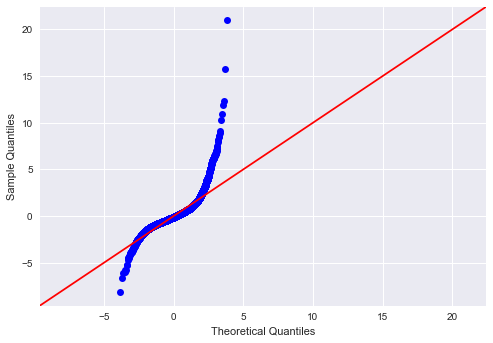

In [44]:
resids = model.resid
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

In [45]:
formula = 'price~ floors+C(waterfront)+C(view)'

In [46]:
model = smf.ols(formula=formula,data=kc_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     690.3
Date:                Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:48:50   Log-Likelihood:            -2.6015e+05
No. Observations:               18402   AIC:                         5.203e+05
Df Residuals:                   18395   BIC:                         5.204e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.923e+05   2589.265    190.140      0.000    4.87e+05    4.97e+05
C(waterfront)[T.1.0]  6.131e+05   3.66e+04     16.734      0.000    5.41e+05    6.85e+05
C(view)[T.1.0]        3.073e+05   1.96e+04     15.650      0.000    2.69e+05    3.46e+05
C(view)[T.2.0]        3.054e+05   1.21e+04     25.211      0.000    2.82e+05    3.29e+05
C(view)[T.3.0]        4.823e+05   1.66e+04     29.119      0.000     4.5e+05    5.15e+05
C(view)[T.4.0]        7.297e+05   2.45e+04     29.821      0.000    6.82e+05    7.78e+05
floors                7169.4167   2452.341      2.923      0.003    2362.600     1.2e+04
==============================================================================
Omnibus:                    15447.585   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011828.945
Skew:                           3.646   Prob(JB):                         0.00
Kurtosis:                      38.588   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

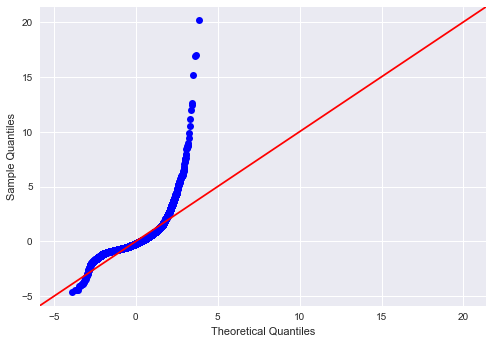

In [47]:
resids = model.resid
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

# INTERPRATING data
Assessing the model:
Assess parameters (slope,intercept)
Check if the model explains the variation in the data (RMSE, F, R_square)
Are the coeffs, slopes, intercepts in appropriate units?
Whats the impact of collinearity? Can we ignore?

Revise the fitted model
Multicollinearity is big issue for lin regression and cannot fully remove it
Use the predictive ability of model to test it (like R2 and RMSE)
Check for missed non-linearity

# CONCLUSION and RECOMMENDATIONS